# Proyek Analisis Data: Bike Sharing Dataset

*   day.csv
*   hour.csv


- **Nama:** Ubeid Brimbi Sentiaki
- **Email:** m215b4ky4371@bangkit.academy
- **ID Dicoding:** m215b4ky4371

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan penggunaan sepeda pada hari kerja dan akhir pekan?
Tahapnya membandingkan jumlah penyewaan sepeda pada hari kerja (kolom "workingday") dan akhir pekan. Lalu divisualisasikan dengan diagram batang yang membandingkan rata-rata penyewaan sepeda pada hari kerja dan akhir pekan.

- Bagaimana tren penyewaan sepeda berubah berdasarkan waktu dalam sehari? (khusus untuk "hour.csv")
Melihat bagaimana pola penyewaan sepeda bervariasi sepanjang hari dengan menggunakan kolom "hr" dan "cnt". Lalu divisualisasikan menggunakan diagram garis untuk menggambarkan perubahan jumlah penyewaan di setiap jam.

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="dark")

## Data Wrangling

### Gathering Data

In [6]:
# Memuat data day
day_df = pd.read_csv('/content/submission/data/day.csv')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Memuat data hour
hour_df = pd.read_csv('/content/submission/data/hour.csv')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada data day terdapat kolom yang saya butuhkan yaitu workingday dan holiday yang akan telah saya tanyakan
- Pada tabel hour juga sama terdapat data yang saya perlukan yaitu kolom hr dan cnt

### Assessing Data

In [11]:
# Menilai data day

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
# Menilai data hour

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
# Menilai data

print("DUPLIKASI DATA")
print("Jumlah duplikasi pada data day: ", day_df.duplicated().sum())
print("=======================================================================")
print("Jumlah duplikasi pada data day: ", hour_df.duplicated().sum())


DUPLIKASI DATA
Jumlah duplikasi pada data day:  0
Jumlah duplikasi pada data day:  0


**Insight:**
- Di kedua tabel day dan hour terdapat kolom dteday yang memilki tipe data object yang seharusnya datetime

### Cleaning Data

In [22]:
# Mengganti tipe data kolom dteday menjadi datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [23]:
day_df.info()
print("")
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [25]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [31]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Tipe data pada dteday telah diubah menjadi datetime
- Tidak ada masalah dalam data day dan hour

## Exploratory Data Analysis (EDA)

### Explore ...

In [35]:
# 1. Penggunaan sepeda terbanyak: holiday vs weekday

# Membuat DataFrame yang mengelompokkan penggunaan sepeda berdasarkan holiday atau weekday
holiday_vs_weekday_df = day_df.groupby(['holiday', 'weekday'])['cnt'].sum().reset_index()
holiday_vs_weekday_df['holiday_label'] = holiday_vs_weekday_df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Weekday')
holiday_vs_weekday_df_sorted = holiday_vs_weekday_df.sort_values(by='cnt', ascending=False)

# 2. Pengaruh musim terhadap penggunaan sepeda

# Membuat DataFrame yang mengelompokkan penggunaan sepeda berdasarkan musim (season)
season_usage_df = day_df.groupby('season')['cnt'].sum().reset_index()
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_usage_df['season_label'] = season_usage_df['season'].map(season_mapping)
season_usage_df_sorted = season_usage_df.sort_values(by='cnt', ascending=False)

# Menampilkan DataFrame
print("Penggunaan sepeda berdasarkan Holiday dan Weekday:")
print("")
print(holiday_vs_weekday_df_sorted)

print("\nPengaruh Musim terhadap Penggunaan Sepeda:")
print("")
print(season_usage_df_sorted)

Penggunaan sepeda berdasarkan Holiday dan Weekday:
    holiday  weekday     cnt holiday_label
4         0        4  481475       Weekday
5         0        5  481296       Weekday
6         0        6  477807       Weekday
2         0        2  468096       Weekday
3         0        3  465645       Weekday
0         0        0  444027       Weekday
1         0        1  395898       Weekday
7         1        1   59605       Holiday
9         1        3    7403       Holiday
11        1        5    6494       Holiday
10        1        4    3920       Holiday
8         1        2    1013       Holiday

Pengaruh Musim terhadap Penggunaan Sepeda:
   season      cnt season_label
2       3  1061129         Fall
1       2   918589       Summer
3       4   841613       Winter
0       1   471348       Spring


**Insight:**
- Faktor hari dan musim sangat mempengaruhi penggunaan sepeda. Sepeda lebih sering digunakan pada hari kerja, mungkin untuk keperluan transportasi rutin, sedangkan pada hari libur penggunaan berkurang. Sementara itu, musim yang lebih nyaman seperti gugur dan musim panas mendorong penggunaan sepeda lebih banyak dibandingkan musim dingin atau semi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [36]:
# Pertanyaan 1: Bagaimana perbedaan penggunaan sepeda pada workday dan weekend?
# Membuat kolom baru untuk mengklasifikasikan 'hari kerja' menjadi 'Akhir Pekan' dan 'Hari Kerja'

day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Workday' if x == 1 else 'Weekend')

In [37]:
# Mengelompokkan berdasarkan day_type dan menghitung mean rental counts

day_grouped = day_df.groupby('day_type')['cnt'].mean().reset_index()

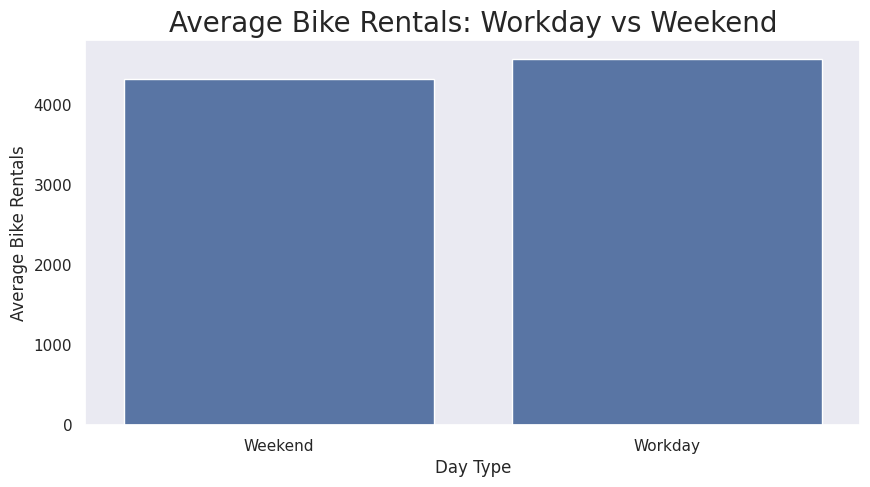

In [38]:
# Visualization: Bar plot membandingkan penyewaan sepeda pada workdays and weekends
plt.figure(figsize=(10, 5))
sns.barplot(x='day_type', y='cnt', data=day_grouped)
plt.title('Average Bike Rentals: Workday vs Weekend', fontsize=20)
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.show()

### Pertanyaan 2:

In [39]:
# Pertanyaan 2: Bagaimana tren penyewaan sepeda berubah berdasarkan waktu dalam sehari? (hour.csv)
# Mengelompokkan berdasarkan hour dan menghitung mean of bike rentals
hour_grouped = hour_df.groupby('hr')['cnt'].mean().reset_index()

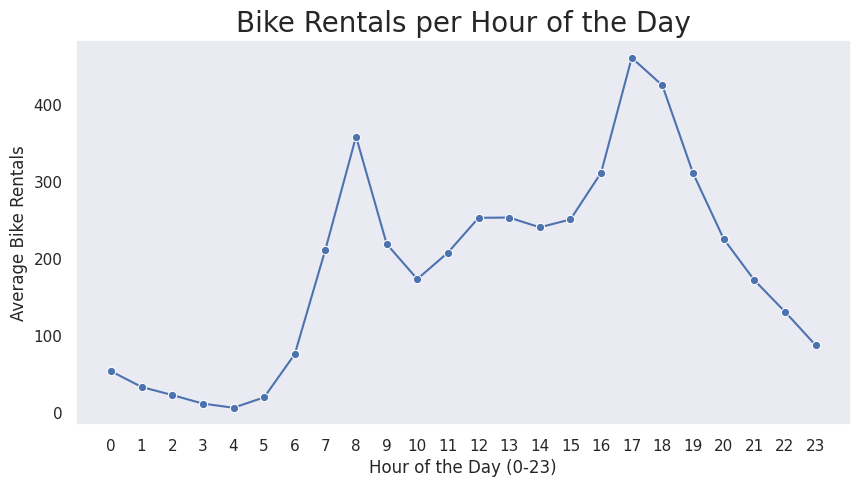

In [42]:
# Visualization: Line plot untuk menunjukkan penyewaan sepeda sepanjang hari
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=hour_grouped, marker='o')
plt.title('Bike Rentals per Hour of the Day', fontsize=20)
plt.xlabel('Hour of the Day (0-23)', fontsize=12)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

**Insight:**
- Perbedaan Penggunaan Sepeda pada Workday vs Weekend. Dari grafik pertanyaan pertama, terlihat bahwa rata-rata penyewaan sepeda pada workday sedikit lebih tinggi dibandingkan weekend. Perbedaannya tidak terlalu signifikan, dengan rata-rata sekitar:
Hari Kerja: ±4500 penyewaan
Akhir Pekan: ±4200 penyewaan

Hal ini menunjukkan bahwa layanan bike sharing dimanfaatkan secara konsisten baik pada hari kerja maupun akhir pekan


- Tren Penyewaan Sepeda berdasarkan Waktu. Grafik pertanyaan kedua menunjukkan pola yang sangat jelas dengan dua puncak utama:
Puncak Pagi: Sekitar jam 8-9 pagi (±350 penyewaan)
Puncak Sore: Sekitar jam 17-18 (±450 penyewaan)

Periode terendah terjadi pada dini hari (jam 2-4) dengan kurang dari 50 penyewaan
Terdapat pola yang konsisten:

Mulai meningkat tajam dari jam 6 pagi
Menurun setelah puncak pagi
Stabil di siang hari
Meningkat lagi menjelang sore
Menurun secara bertahap setelah jam 19

# Analisis Lanjutan

In [46]:
# Menghitung Frequency
frequency_df = hour_df.groupby(['casual', 'registered'])['cnt'].sum().reset_index()

# Membuat kolom untuk User Type
frequency_df['User Type'] = frequency_df.apply(lambda row: 'Casual' if row['casual'] > 0 else 'Registered', axis=1)

# Menghitung Recency
last_rentals = hour_df.groupby(['casual', 'registered'])['dteday'].max().reset_index()
last_rentals['Recency'] = (pd.to_datetime('2012-12-31') - last_rentals['dteday']).dt.days

# Menggabungkan Frequency dan Recency
rfm_df = frequency_df.merge(last_rentals[['casual', 'registered', 'Recency']], on=['casual', 'registered'])

In [47]:
print(rfm_df[['User Type', 'cnt', 'Recency']])

        User Type  cnt  Recency
0      Registered  141        0
1      Registered  328        1
2      Registered  492        0
3      Registered  564        3
4      Registered  685        3
...           ...  ...      ...
10482      Casual  672      226
10483      Casual  679      289
10484      Casual  730      226
10485      Casual  743       86
10486      Casual  685      289

[10487 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


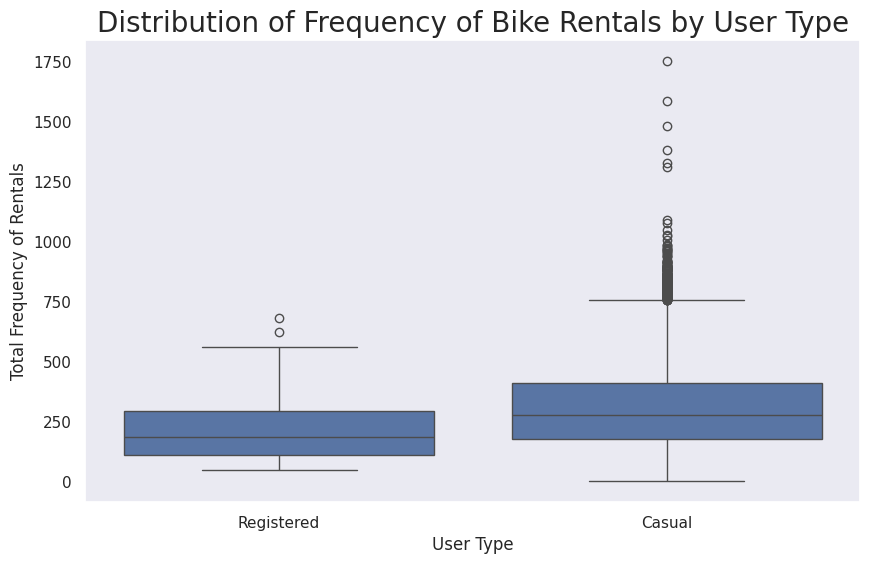

In [49]:
# Visualisasi Frequency menggunakan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='User Type', y='cnt', data=rfm_df)
plt.title('Distribution of Frequency of Bike Rentals by User Type', fontsize=20)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Total Frequency of Rentals', fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


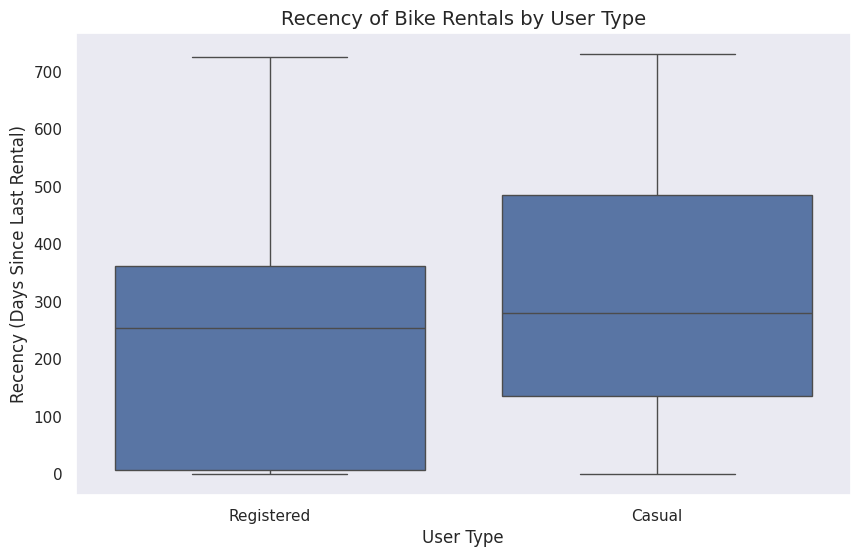

In [50]:
# Visualisasi Recency menggunakan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='User Type', y='Recency', data=rfm_df)
plt.title('Recency of Bike Rentals by User Type', fontsize=14)
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Recency (Days Since Last Rental)', fontsize=12)
plt.show()

**Insight:**
- Analisis Frequency
   - Pengguna Casual: Memiliki rentang frekuensi yang lebih luas (box plot lebih tinggi), Memiliki lebih banyak outlier di atas (titik-titik) mencapai 1750 penyewaan, Distribusi lebih menyebar (box lebih besar)
   - Pengguna Registered: Rentang frekuensi lebih sempit, Sedikit outlier, Distribusi lebih terkonsentrasi (box lebih kecil)

- Analisis Recency
   - Pengguna Casual: Median recency sekitar 275 hari, Rentang recency lebih lebar (100-500 hari), Box plot lebih besar menunjukkan variasi yang lebih tinggi
   - Pengguna Registered: Median recency sekitar 250 hari, Rentang recency lebih sempit, Box plot lebih kecil menunjukkan konsistensi penggunaan

## Conclusion

- Untuk pertanyaan pertama:
Penggunaan sepeda relatif seimbang antara workday dan weekend, dengan selisih yang tidak terlalu besar. Ini menunjukkan bahwa sistem bike sharing berhasil melayani kebutuhan transportasi baik untuk tujuan kerja maupun rekreasi.

- Untuk pertanyaan kedua:
Pola penggunaan sepeda sangat dipengaruhi oleh rutinitas harian pengguna, terutama jam berangkat dan pulang kerja/sekolah. Dua puncak yang terlihat jelas mencerminkan pola commuting (perjalanan pulang-pergi) masyarakat. Layanan tetap digunakan sepanjang hari meskipun dengan intensitas yang berbeda, dengan penggunaan minimal pada dini hari.

In [54]:
day_df_cleaned = day_df.drop_duplicates()
hour_df_cleaned = hour_df.drop_duplicates()

# Convert 'dteday' to datetime and fill NaN values
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])
hour_df_cleaned['dteday'] = pd.to_datetime(hour_df_cleaned['dteday'])

# For demonstration, let's save the cleaned DataFrames
# Define the file names
cleaned_day_file = '/content/submission/data/cleaned_day.csv'
cleaned_hour_file = '/content/submission/data/cleaned_hour.csv'

# Save the cleaned DataFrames to CSV
day_df_cleaned.to_csv(cleaned_day_file, index=False)
hour_df_cleaned.to_csv(cleaned_hour_file, index=False)

cleaned_day_file, cleaned_hour_file

# Menyimpan DataFrame gabungan ke dalam file CSV
combined_file = '/content/submission/data/combined_bike_sharing_data.csv'

# Gabungkan data tanpa memerlukan kolom 'hr' dari day_df
combined_df = pd.concat([day_df_cleaned, hour_df_cleaned[['dteday', 'season', 'yr', 'mnth', 'holiday',
                                                           'weekday', 'workingday', 'weathersit',
                                                           'temp', 'atemp', 'hum', 'windspeed',
                                                           'casual', 'registered', 'cnt', 'hr']]],
                         axis=0, ignore_index=True)

# Simpan hasil penggabungan ke CSV
combined_df.to_csv(combined_file, index=False)

combined_file


'/content/submission/data/combined_bike_sharing_data.csv'